# Couplind Telemac and Tomawac using tel2tom

The following script will construct the weights of interpolation that are going to be used coupling using tel2tom with different meshes. 

In [1]:
!run_telfile.py tel2tom -h



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

usage: run_telfile.py tel2tom [-h] --t2d-bnd Telemac Boundary File --tom-bnd
                              Tomawac Boundary File
                              [--t2d-contour T2D_CONTOUR]
                              [--tom-contour TOM_CONTOUR]
                              Telemac File Tomawac File

positional arguments:
  Telemac File          First file
  Tomawac File          Second file

optional arguments:
  -h, --help            show this help message and exit
  --t2d-bnd Telemac Boundary File
                        First file boundary file
  --tom-bnd Tomawac Boundary File
                        Second file boundary file
  --t2d-contour T2D_CONTOUR
                        Polygonal zone to keep in Telemac2d
  --tom-contour TOM_CONTOUR
                        Polygonal zone to exclude in Tomawac


In [2]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/notebooks/data

# Create the mesh with correct weights 
!run_telfile.py tel2tom t2dmesh.med tommesh.med --t2d-bnd t2dmesh.bnd --tom-bnd tommesh.bnd



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

t2dmesh.bnd tommesh.bnd
  ~> Building tom2tel
tommesh-tom2tel.med tommesh-tom2tel.bnd


  - Created tommesh-tom2tel.med and tommesh-tom2tel.bnd
  ~> Building tel2tom
  - Created t2dmesh-tel2tom.med and t2dmesh-tel2tom.bnd


My work is done




To realise the coupling, in the telemac file add
COUPLING WITH 'TOMAWAC2'
GEOMETRY FILE = t2dmesh-tom2tel.med

and in the tomawac file 
GEOMETRY FILE = tommesh-tel2tom.med

We can now look at the weights that are computed on the mesh. on each mesh there are 3 weigths and 3 list of points.

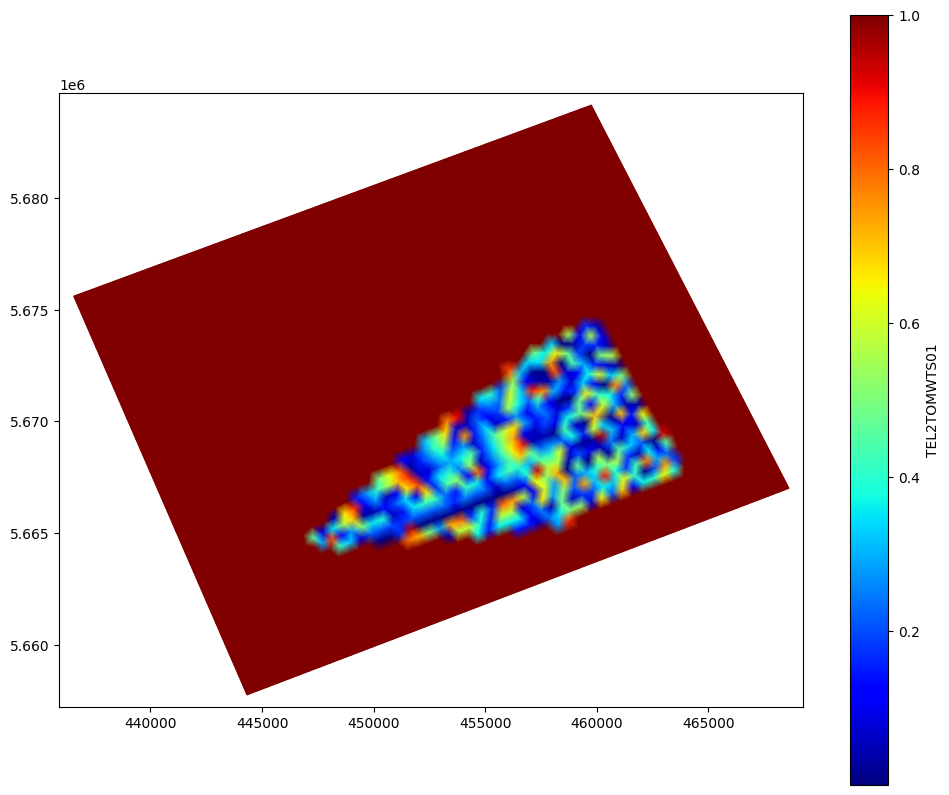

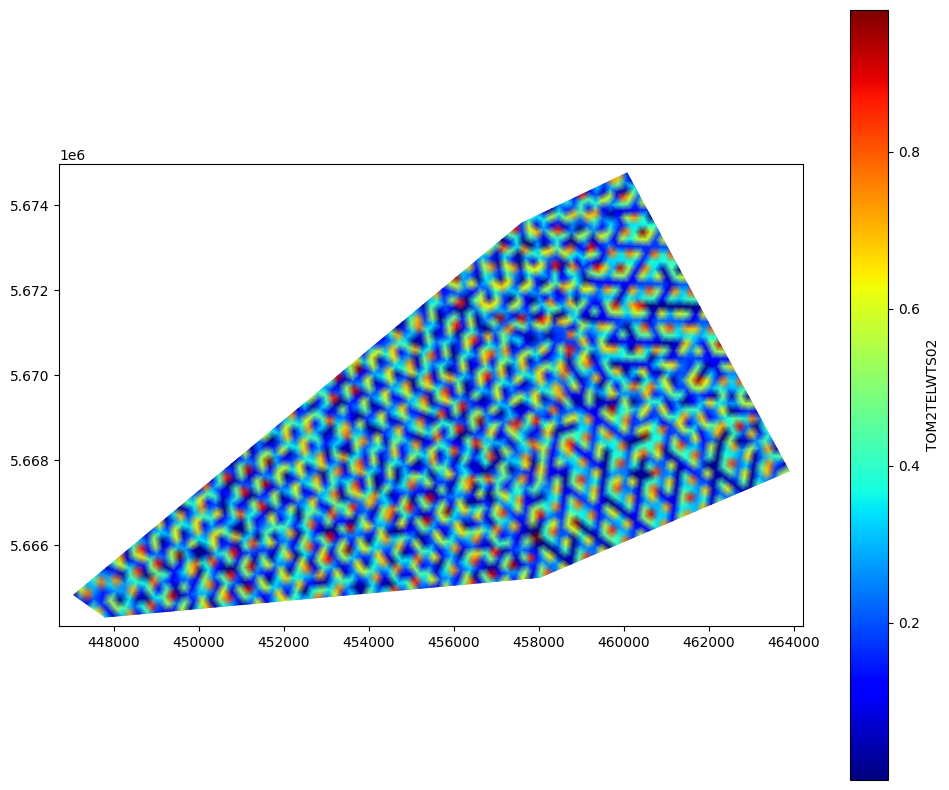

In [3]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import *

file=path.join(environ['HOMETEL'],'notebooks','data','tommesh-tom2tel.med')
tom=TelemacFile(file)
poids1=tom.get_data_value('TEL2TOMWTS01', -1)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_aspect('equal')
plot2d_triangle_mesh(ax, tom.tri)
plot2d_scalar_map(fig, ax, tom.tri, poids1, data_name='TEL2TOMWTS01')
plt.show()
plt.close(fig)

file=path.join(environ['HOMETEL'],'notebooks','data','t2dmesh-tel2tom.med')
t2d=TelemacFile(file)
poids2=t2d.get_data_value('TOM2TELWTS02',-1)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_aspect('equal')
plot2d_triangle_mesh(ax, t2d.tri)
plot2d_scalar_map(fig, ax, t2d.tri, poids2, data_name='TOM2TELWTS02')
plt.show()
plt.close(fig)